In [315]:
import os
import sys
os.chdir("/Users/DanPfeiffer/Documents/code/data-collector/src")
sys.path.append(os.getcwd())
import pandas as pd
import importlib
import plotly.express as px

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### TRAINING

In [ ]:
training_df = pd.read_csv('../data/transformed/box_scores.csv')

In [140]:
train_features = [
    'neutral_site',
    'type_id',
    'venue_indoor',
    'week',
    'game_time_hrs',
    'home_timezones_traveled',
    'away_timezones_traveled',
    'timezones_traveled_delta',
    'home_travel_distance',
    'away_travel_distance',
    'travel_delta',
    'home_days_rest',
    'away_days_rest',
    "rest_differential",
    'home_rankings_home_advantage_rating',
    'home_offense_scoring_points_per_game',
    'home_offense_scoring_points_per_game_delta',
    'home_offense_scoring_yards_per_point',
    'home_offense_scoring_yards_per_point_delta',
    'home_offense_scoring_points_per_play',
    'home_offense_scoring_points_per_play_margin',
    'home_offense_scoring_td_per_game',
    'home_offense_scoring_rz_attempts',
    'home_offense_scoring_rz_tds',
    'home_offense_scoring_rz_td_pcnt',
    'home_offense_scoring_2pt_att',
    'home_offense_scoring_2pt_made',
    'home_offense_scoring_points_per_fg',
    'home_offense_scoring_ep_pcnt',
    'home_offense_scoring_2pt_pcnt',
    'home_offense_scoring_off_td',
    'home_offense_scoring_def_td',
    'home_offense_scoring_spec_td',
    'home_offense_scoring_off_ppg',
    'home_offense_scoring_def_ppg',
    'home_offense_scoring_spec_ppg',
    'home_offense_scoring_point_share_pcnt',
    'home_offense_total_yards',
    'home_offense_total_plays',
    'home_offense_total_yards_per_play',
    'home_offense_total_1st_downs',
    'home_offense_total_3rd_downs',
    'home_offense_total_3rd_down_conversions',
    'home_offense_total_4th_downs',
    'home_offense_total_4th_down_conversions',
    'home_offense_total_time_of_possession',
    'home_offense_total_seconds_per_play',
    'home_offense_total_1st_downs_per_play',
    'home_offense_total_3rd_down_conversion_pcnt',
    'home_offense_total_4th_down_conversion_pcnt',
    'home_offense_total_punts_per_play',
    'home_offense_total_punts_per_score',
    'home_offense_total_opp_tackles',
    'home_offense_total_opp_solo_tackles',
    'home_offense_total_opp_asst_tackles',
    'home_offense_rushing_attempts',
    'home_offense_rushing_yds',
    'home_offense_rushing_1st_downs',
    'home_offense_rushing_tds',
    'home_offense_rushing_ypa',
    'home_offense_rushing_play_pcnt',
    'home_offense_rushing_td_pcnt',
    'home_offense_rushing_1st_down_pcnt',
    'home_offense_rushing_yards_pcnt',
    'home_offense_passing_attempts',
    'home_offense_passing_completions',
    'home_offense_passing_incompletions',
    'home_offense_passing_completion_pcnt',
    'home_offense_passing_yards',
    'home_offense_passing_yards_gross',
    'home_offense_passing_ypa',
    'home_offense_passing_ypc',
    'home_offense_passing_td',
    'home_offense_passing_td_pcnt',
    'home_offense_passing_sacks',
    'home_offense_passing_sack_pcnt',
    'home_offense_passing_1st_downs',
    'home_offense_passing_1st_down_pcnt',
    'home_offense_passing_pass_rtg',
    'home_offense_passing_play_pcnt',
    'home_offense_passing_yds_pcnt',
    'home_offense_special_teams_non_off_td',
    'home_offense_special_teams_fg_att',
    'home_offense_special_teams_fg_made',
    'home_offense_special_teams_fg_blocked',
    'home_offense_special_teams_kicking_ppg',
    'home_offense_special_teams_punts',
    'home_offense_special_teams_punts_blocked',
    'home_offense_special_teams_gross_punt_yards',
    'home_offense_special_teams_net_punt_yards',
    'home_offense_special_teams_kickoff_touchback_pcnt',
    'home_offense_special_teams_fg_made_pcnt_all',
    'home_offense_special_teams_fg_block_pcnt',
    'home_offense_special_teams_fg_made_pcnt',
    'home_offense_special_teams_punt_block_pcnt',
    'home_offense_special_teams_net_punt_ypa_all',
    'home_offense_special_teams_gross_punt_ypa',
    'home_offense_special_teams_net_punt_ypa',
    'home_defense_scoring_ppg',
    'home_defense_scoring_yards_per_point',
    'home_defense_scoring_points_per_play',
    'home_defense_scoring_tds',
    'home_defense_scoring_rz_attempts',
    'home_defense_scoring_rz_tds',
    'home_defense_scoring_rz_td_pcnt',
    'home_defense_scoring_2pt_att',
    'home_defense_scoring_2pt_made',
    'home_defense_scoring_points_per_fga',
    'home_defense_scoring_ep_pcnt',
    'home_defense_scoring_2pt_pcnt',
    'home_defense_scoring_off_td',
    'home_defense_scoring_def_td',
    'home_defense_scoring_spec_td',
    'home_defense_scoring_off_ppg',
    'home_defense_scoring_def_ppg',
    'home_defense_scoring_spec_ppg',
    'home_defense_scoring_point_share_pcnt',
    'home_defense_total_yards',
    'home_defense_total_plays',
    'home_defense_total_yards_per_play',
    'home_defense_total_1st_downs',
    'home_defense_total_3rd_downs',
    'home_defense_total_3rd_down_conversions',
    'home_defense_total_4th_downs',
    'home_defense_total_4th_down_conversions',
    'home_defense_total_time_of_possession',
    'home_defense_total_seconds_per_play',
    'home_defense_total_1st_downs_per_play',
    'home_defense_total_3rd_down_conversion_pcnt',
    'home_defense_total_4th_down_conversion_pcnt',
    'home_defense_total_punts_per_play',
    'home_defense_total_punts_per_score',
    'home_defense_total_tackles',
    'home_defense_total_solo_tackles',
    'home_defense_total_assisted_tackles',
    'home_defense_rushing_attempts',
    'home_defense_rushing_ypg',
    'home_defense_rushing_1st_downs',
    'home_defense_rushing_tds',
    'home_defense_rushing_ypa',
    'home_defense_rushing_play_pcnt',
    'home_defense_rushing_td_pcnt',
    'home_defense_rushing_1st_down_pcnt',
    'home_defense_rushing_yards_percent',
    'home_defense_passing_attempts',
    'home_defense_passing_completions',
    'home_defense_passing_incompletions',
    'home_defense_passing_completion_pcnt',
    'home_defense_passing_yards',
    'home_defense_passing_yards_gross',
    'home_defense_passing_ypa',
    'home_defense_passing_ypc',
    'home_defense_passing_1st_downs',
    'home_defense_passing_tds',
    'home_defense_passing_td_pcnt',
    'home_defense_passing_pass_rtg',
    'home_defense_passing_sack_pcnt',
    'home_defense_passing_play_pcnt',
    'home_defense_passing_yards_pcnt',
    'home_defense_passing_sacks',
    'home_defense_passing_1st_down_pcnt',
    'home_defense_special_teams_non_off_td',
    'home_defense_special_teams_fg_att',
    'home_defense_special_teams_fg_made',
    'home_defense_special_teams_fg_blocked',
    'home_defense_special_teams_kicking_ppg',
    'home_defense_special_teams_punts',
    'home_defense_special_teams_punts_blocked',
    'home_defense_special_teams_gross_punt_yards',
    'home_defense_special_teams_net_punt_yards',
    'home_defense_special_teams_touchbacks',
    'home_defense_special_teams_kickoff_touchback_pcnt',
    'home_defense_special_teams_fg_made_pcnt_all',
    'home_defense_special_teams_fg_block_pcnt',
    'home_defense_special_teams_fg_made_pcnt',
    'home_defense_special_teams_punt_block_pcnt',
    'home_defense_special_teams_net_punt_ypa_all',
    'home_defense_special_teams_gross_punt_ypa',
    'home_defense_special_teams_net_punt_ypa',
    'home_off_turnovers_int',
    'home_off_turnovers_int_game_pcnt',
    'home_off_turnovers_fumbles',
    'home_off_turnovers_fumbles_lost',
    'home_off_turnovers_fumbles_not_lost',
    'home_off_turnovers_safeties',
    'home_off_turnovers_turnovers',
    'home_off_turnovers_turnover_margin',
    'home_off_turnovers_int_pcnt',
    'home_off_turnovers_fumble_rec_pcnt',
    'home_off_turnovers_giveaway_fumble_rec_pcnt',
    'home_off_turnovers_takeaway_fumble_rec_pcnt',
    'home_def_turnovers_int',
    'home_def_turnovers_int_game_pcnt',
    'home_def_turnovers_fumbles',
    'home_def_turnovers_fumbles_lost',
    'home_def_turnovers_fumbles_not_lost',
    'home_def_turnovers_safeties',
    'home_def_turnovers_takeaways',
    'home_def_turnovers_fumble_rec_pcnt',
    'home_def_turnovers_int_pcnt',
    'home_def_turnovers_opp_fumble_rec_pcnt',
    'home_def_turnovers_opp_giveaway_fumble_rec_pcnt',
    'home_def_turnovers_opp_takeaway_fumble_rec_pcnt',
    'home_penalties_penalties',
    'home_penalties_penalty_yards',
    'home_penalties_penalty_1st_downs',
    'home_penalties_yards_per_penalty',
    'home_penalties_penalty_rate',
    'home_penalties_opponent_penalties',
    'home_penalties_opponent_penalty_yards',
    'home_penalties_opponent_penalty_1st_downs',
    'home_penalties_opponent_yards_per_penalty',
    'home_penalties_opponent_penalty_rate',
    'home_rankings_predictive_rating',
    'home_rankings_home_rating',
    'home_rankings_road_rating',
    'home_rankings_sos_rating',
    'home_rankings_sos_basic_rating',
    'home_rankings_luck_rating',
    'home_rankings_consistency_rating',
    'road_rankings_home_advantage_rating',
    'road_offense_scoring_points_per_game',
    'road_offense_scoring_points_per_game_delta',
    'road_offense_scoring_yards_per_point',
    'road_offense_scoring_yards_per_point_delta',
    'road_offense_scoring_points_per_play',
    'road_offense_scoring_points_per_play_margin',
    'road_offense_scoring_td_per_game',
    'road_offense_scoring_rz_attempts',
    'road_offense_scoring_rz_tds',
    'road_offense_scoring_rz_td_pcnt',
    'road_offense_scoring_2pt_att',
    'road_offense_scoring_2pt_made',
    'road_offense_scoring_points_per_fg',
    'road_offense_scoring_ep_pcnt',
    'road_offense_scoring_2pt_pcnt',
    'road_offense_scoring_off_td',
    'road_offense_scoring_def_td',
    'road_offense_scoring_spec_td',
    'road_offense_scoring_off_ppg',
    'road_offense_scoring_def_ppg',
    'road_offense_scoring_spec_ppg',
    'road_offense_scoring_point_share_pcnt',
    'road_offense_total_yards',
    'road_offense_total_plays',
    'road_offense_total_yards_per_play',
    'road_offense_total_1st_downs',
    'road_offense_total_3rd_downs',
    'road_offense_total_3rd_down_conversions',
    'road_offense_total_4th_downs',
    'road_offense_total_4th_down_conversions',
    'road_offense_total_time_of_possession',
    'road_offense_total_seconds_per_play',
    'road_offense_total_1st_downs_per_play',
    'road_offense_total_3rd_down_conversion_pcnt',
    'road_offense_total_4th_down_conversion_pcnt',
    'road_offense_total_punts_per_play',
    'road_offense_total_punts_per_score',
    'road_offense_total_opp_tackles',
    'road_offense_total_opp_solo_tackles',
    'road_offense_total_opp_asst_tackles',
    'road_offense_rushing_attempts',
    'road_offense_rushing_yds',
    'road_offense_rushing_1st_downs',
    'road_offense_rushing_tds',
    'road_offense_rushing_ypa',
    'road_offense_rushing_play_pcnt',
    'road_offense_rushing_td_pcnt',
    'road_offense_rushing_1st_down_pcnt',
    'road_offense_rushing_yards_pcnt',
    'road_offense_passing_attempts',
    'road_offense_passing_completions',
    'road_offense_passing_incompletions',
    'road_offense_passing_completion_pcnt',
    'road_offense_passing_yards',
    'road_offense_passing_yards_gross',
    'road_offense_passing_ypa',
    'road_offense_passing_ypc',
    'road_offense_passing_td',
    'road_offense_passing_td_pcnt',
    'road_offense_passing_sacks',
    'road_offense_passing_sack_pcnt',
    'road_offense_passing_1st_downs',
    'road_offense_passing_1st_down_pcnt',
    'road_offense_passing_pass_rtg',
    'road_offense_passing_play_pcnt',
    'road_offense_passing_yds_pcnt',
    'road_offense_special_teams_non_off_td',
    'road_offense_special_teams_fg_att',
    'road_offense_special_teams_fg_made',
    'road_offense_special_teams_fg_blocked',
    'road_offense_special_teams_kicking_ppg',
    'road_offense_special_teams_punts',
    'road_offense_special_teams_punts_blocked',
    'road_offense_special_teams_gross_punt_yards',
    'road_offense_special_teams_net_punt_yards',
    'road_offense_special_teams_kickoff_touchback_pcnt',
    'road_offense_special_teams_fg_made_pcnt_all',
    'road_offense_special_teams_fg_block_pcnt',
    'road_offense_special_teams_fg_made_pcnt',
    'road_offense_special_teams_punt_block_pcnt',
    'road_offense_special_teams_net_punt_ypa_all',
    'road_offense_special_teams_gross_punt_ypa',
    'road_offense_special_teams_net_punt_ypa',
    'road_defense_scoring_ppg',
    'road_defense_scoring_yards_per_point',
    'road_defense_scoring_points_per_play',
    'road_defense_scoring_tds',
    'road_defense_scoring_rz_attempts',
    'road_defense_scoring_rz_tds',
    'road_defense_scoring_rz_td_pcnt',
    'road_defense_scoring_2pt_att',
    'road_defense_scoring_2pt_made',
    'road_defense_scoring_points_per_fga',
    'road_defense_scoring_ep_pcnt',
    'road_defense_scoring_2pt_pcnt',
    'road_defense_scoring_off_td',
    'road_defense_scoring_def_td',
    'road_defense_scoring_spec_td',
    'road_defense_scoring_off_ppg',
    'road_defense_scoring_def_ppg',
    'road_defense_scoring_spec_ppg',
    'road_defense_scoring_point_share_pcnt',
    'road_defense_total_yards',
    'road_defense_total_plays',
    'road_defense_total_yards_per_play',
    'road_defense_total_1st_downs',
    'road_defense_total_3rd_downs',
    'road_defense_total_3rd_down_conversions',
    'road_defense_total_4th_downs',
    'road_defense_total_4th_down_conversions',
    'road_defense_total_time_of_possession',
    'road_defense_total_seconds_per_play',
    'road_defense_total_1st_downs_per_play',
    'road_defense_total_3rd_down_conversion_pcnt',
    'road_defense_total_4th_down_conversion_pcnt',
    'road_defense_total_punts_per_play',
    'road_defense_total_punts_per_score',
    'road_defense_total_tackles',
    'road_defense_total_solo_tackles',
    'road_defense_total_assisted_tackles',
    'road_defense_rushing_attempts',
    'road_defense_rushing_ypg',
    'road_defense_rushing_1st_downs',
    'road_defense_rushing_tds',
    'road_defense_rushing_ypa',
    'road_defense_rushing_play_pcnt',
    'road_defense_rushing_td_pcnt',
    'road_defense_rushing_1st_down_pcnt',
    'road_defense_rushing_yards_percent',
    'road_defense_passing_attempts',
    'road_defense_passing_completions',
    'road_defense_passing_incompletions',
    'road_defense_passing_completion_pcnt',
    'road_defense_passing_yards',
    'road_defense_passing_yards_gross',
    'road_defense_passing_ypa',
    'road_defense_passing_ypc',
    'road_defense_passing_1st_downs',
    'road_defense_passing_tds',
    'road_defense_passing_td_pcnt',
    'road_defense_passing_pass_rtg',
    'road_defense_passing_sack_pcnt',
    'road_defense_passing_play_pcnt',
    'road_defense_passing_yards_pcnt',
    'road_defense_passing_sacks',
    'road_defense_passing_1st_down_pcnt',
    'road_defense_special_teams_non_off_td',
    'road_defense_special_teams_fg_att',
    'road_defense_special_teams_fg_made',
    'road_defense_special_teams_fg_blocked',
    'road_defense_special_teams_kicking_ppg',
    'road_defense_special_teams_punts',
    'road_defense_special_teams_punts_blocked',
    'road_defense_special_teams_gross_punt_yards',
    'road_defense_special_teams_net_punt_yards',
    'road_defense_special_teams_touchbacks',
    'road_defense_special_teams_kickoff_touchback_pcnt',
    'road_defense_special_teams_fg_made_pcnt_all',
    'road_defense_special_teams_fg_block_pcnt',
    'road_defense_special_teams_fg_made_pcnt',
    'road_defense_special_teams_punt_block_pcnt',
    'road_defense_special_teams_net_punt_ypa_all',
    'road_defense_special_teams_gross_punt_ypa',
    'road_defense_special_teams_net_punt_ypa',
    'road_off_turnovers_int',
    'road_off_turnovers_int_game_pcnt',
    'road_off_turnovers_fumbles',
    'road_off_turnovers_fumbles_lost',
    'road_off_turnovers_fumbles_not_lost',
    'road_off_turnovers_safeties',
    'road_off_turnovers_turnovers',
    'road_off_turnovers_turnover_margin',
    'road_off_turnovers_int_pcnt',
    'road_off_turnovers_fumble_rec_pcnt',
    'road_off_turnovers_giveaway_fumble_rec_pcnt',
    'road_off_turnovers_takeaway_fumble_rec_pcnt',
    'road_def_turnovers_int',
    'road_def_turnovers_int_game_pcnt',
    'road_def_turnovers_fumbles',
    'road_def_turnovers_fumbles_lost',
    'road_def_turnovers_fumbles_not_lost',
    'road_def_turnovers_safeties',
    'road_def_turnovers_takeaways',
    'road_def_turnovers_fumble_rec_pcnt',
    'road_def_turnovers_int_pcnt',
    'road_def_turnovers_opp_fumble_rec_pcnt',
    'road_def_turnovers_opp_giveaway_fumble_rec_pcnt',
    'road_def_turnovers_opp_takeaway_fumble_rec_pcnt',
    'road_penalties_penalties',
    'road_penalties_penalty_yards',
    'road_penalties_penalty_1st_downs',
    'road_penalties_yards_per_penalty',
    'road_penalties_penalty_rate',
    'road_penalties_opponent_penalties',
    'road_penalties_opponent_penalty_yards',
    'road_penalties_opponent_penalty_1st_downs',
    'road_penalties_opponent_yards_per_penalty',
    'road_penalties_opponent_penalty_rate',
    'road_rankings_predictive_rating',
    'road_rankings_home_rating',
    'road_rankings_road_rating',
    'road_rankings_sos_rating',
    'road_rankings_sos_basic_rating',
    'road_rankings_luck_rating',
    'road_rankings_consistency_rating',
    'rankings_predictive_rating_matchup_differential',
    'rankings_home_rating_matchup_differential',
    'rankings_sos_rating_matchup_differential',
    'rankings_sos_basic_rating_matchup_differential',
    'rankings_luck_rating_matchup_differential',
    'rankings_consistency_rating_matchup_differential',
    'offense_scoring_points_per_game_matchup_differential',
    'offense_scoring_points_per_game_delta_matchup_differential',
    'offense_scoring_yards_per_point_matchup_differential',
    'offense_scoring_yards_per_point_delta_matchup_differential',
    'offense_scoring_points_per_play_matchup_differential',
    'offense_scoring_td_per_game_matchup_differential',
    'offense_scoring_rz_attempts_matchup_differential',
    'offense_scoring_rz_tds_matchup_differential',
    'offense_scoring_rz_td_pcnt_matchup_differential',
    'offense_scoring_2pt_att_matchup_differential',
    'offense_scoring_points_per_fg_matchup_differential',
    'offense_scoring_ep_pcnt_matchup_differential',
    'offense_scoring_2pt_pcnt_matchup_differential',
    'offense_scoring_off_td_matchup_differential',
    'offense_scoring_def_td_matchup_differential',
    'offense_scoring_spec_td_matchup_differential',
    'offense_scoring_off_ppg_matchup_differential',
    'offense_scoring_def_ppg_matchup_differential',
    'offense_scoring_spec_ppg_matchup_differential',
    'offense_scoring_point_share_pcnt_matchup_differential',
    'offense_total_yards_matchup_differential',
    'offense_total_plays_matchup_differential',
    'offense_total_yards_per_play_matchup_differential',
    'offense_total_1st_downs_matchup_differential',
    'offense_total_3rd_downs_matchup_differential',
    'offense_total_3rd_down_conversions_matchup_differential',
    'offense_total_4th_downs_matchup_differential',
    'offense_total_4th_down_conversions_matchup_differential',
    'offense_total_time_of_possession_matchup_differential',
    'offense_total_seconds_per_play_matchup_differential',
    'offense_total_1st_downs_per_play_matchup_differential',
    'offense_total_3rd_down_conversion_pcnt_matchup_differential',
    'offense_total_4th_down_conversion_pcnt_matchup_differential',
    'offense_total_punts_per_play_matchup_differential',
    'offense_total_punts_per_score_matchup_differential',
    'offense_total_opp_tackles_matchup_differential',
    'offense_total_opp_solo_tackles_matchup_differential',
    'offense_total_opp_asst_tackles_matchup_differential',
    'offense_rushing_attempts_matchup_differential',
    'offense_rushing_yds_matchup_differential',
    'offense_rushing_1st_downs_matchup_differential',
    'offense_rushing_tds_matchup_differential',
    'offense_rushing_ypa_matchup_differential',
    'offense_rushing_play_pcnt_matchup_differential',
    'offense_rushing_td_pcnt_matchup_differential',
    'offense_rushing_1st_down_pcnt_matchup_differential',
    'offense_rushing_yards_pcnt_matchup_differential',
    'offense_passing_attempts_matchup_differential',
    'offense_passing_completions_matchup_differential',
    'offense_passing_incompletions_matchup_differential',
    'offense_passing_completion_pcnt_matchup_differential',
    'offense_passing_yards_matchup_differential',
    'offense_passing_yards_gross_matchup_differential',
    'offense_passing_ypa_matchup_differential',
    'offense_passing_ypc_matchup_differential',
    'offense_passing_td_matchup_differential',
    'offense_passing_td_pcnt_matchup_differential',
    'offense_passing_sacks_matchup_differential',
    'offense_passing_sack_pcnt_matchup_differential',
    'offense_passing_1st_downs_matchup_differential',
    'offense_passing_1st_down_pcnt_matchup_differential',
    'offense_passing_pass_rtg_matchup_differential',
    'offense_passing_play_pcnt_matchup_differential',
    'offense_passing_yds_pcnt_matchup_differential',
    'offense_special_teams_non_off_td_matchup_differential',
    'offense_special_teams_fg_att_matchup_differential',
    'offense_special_teams_fg_made_matchup_differential',
    'offense_special_teams_fg_blocked_matchup_differential',
    'offense_special_teams_kicking_ppg_matchup_differential',
    'offense_special_teams_punts_matchup_differential',
    'offense_special_teams_punts_blocked_matchup_differential',
    'offense_special_teams_gross_punt_yards_matchup_differential',
    'offense_special_teams_net_punt_yards_matchup_differential',
    'offense_special_teams_fg_made_pcnt_all_matchup_differential',
    'offense_special_teams_fg_block_pcnt_matchup_differential',
    'offense_special_teams_fg_made_pcnt_matchup_differential',
    'offense_special_teams_punt_block_pcnt_matchup_differential',
    'offense_special_teams_net_punt_ypa_all_matchup_differential',
    'offense_special_teams_gross_punt_ypa_matchup_differential',
    'offense_special_teams_net_punt_ypa_matchup_differential',
    'off_turnovers_int_matchup_differential',
    'off_turnovers_int_game_pcnt_matchup_differential',
    'off_turnovers_fumbles_matchup_differential',
    'off_turnovers_fumbles_lost_matchup_differential',
    'off_turnovers_fumbles_not_lost_matchup_differential',
    'off_turnovers_safeties_matchup_differential',
    'off_turnovers_turnovers_matchup_differential',
    'off_turnovers_turnover_margin_matchup_differential',
    'off_turnovers_int_pcnt_matchup_differential',
    'off_turnovers_fumble_rec_pcnt_matchup_differential',
    'off_turnovers_giveaway_fumble_rec_pcnt_matchup_differential',
    'off_turnovers_takeaway_fumble_rec_pcnt_matchup_differential',
    'penalties_penalties_matchup_differential',
    'penalties_penalty_yards_matchup_differential',
    'penalties_penalty_1st_downs_matchup_differential',
    'penalties_yards_per_penalty_matchup_differential',
    'penalties_penalty_rate_matchup_differential',
    'defense_scoring_ppg_matchup_differential',
    'defense_scoring_yards_per_point_matchup_differential',
    'defense_scoring_points_per_play_matchup_differential',
    'defense_scoring_tds_matchup_differential',
    'defense_scoring_rz_attempts_matchup_differential',
    'defense_scoring_rz_tds_matchup_differential',
    'defense_scoring_rz_td_pcnt_matchup_differential',
    'defense_scoring_2pt_att_matchup_differential',
    'defense_scoring_points_per_fga_matchup_differential',
    'defense_scoring_ep_pcnt_matchup_differential',
    'defense_scoring_2pt_pcnt_matchup_differential',
    'defense_scoring_off_td_matchup_differential',
    'defense_scoring_def_td_matchup_differential',
    'defense_scoring_spec_td_matchup_differential',
    'defense_scoring_off_ppg_matchup_differential',
    'defense_scoring_def_ppg_matchup_differential',
    'defense_scoring_spec_ppg_matchup_differential',
    'defense_scoring_point_share_pcnt_matchup_differential',
    'defense_total_yards_matchup_differential',
    'defense_total_plays_matchup_differential',
    'defense_total_yards_per_play_matchup_differential',
    'defense_total_1st_downs_matchup_differential',
    'defense_total_3rd_downs_matchup_differential',
    'defense_total_3rd_down_conversions_matchup_differential',
    'defense_total_4th_downs_matchup_differential',
    'defense_total_4th_down_conversions_matchup_differential',
    'defense_total_time_of_possession_matchup_differential',
    'defense_total_seconds_per_play_matchup_differential',
    'defense_total_1st_downs_per_play_matchup_differential',
    'defense_total_3rd_down_conversion_pcnt_matchup_differential',
    'defense_total_4th_down_conversion_pcnt_matchup_differential',
    'defense_total_punts_per_play_matchup_differential',
    'defense_total_punts_per_score_matchup_differential',
    'defense_total_tackles_matchup_differential',
    'defense_total_solo_tackles_matchup_differential',
    'defense_total_assisted_tackles_matchup_differential',
    'defense_rushing_attempts_matchup_differential',
    'defense_rushing_ypg_matchup_differential',
    'defense_rushing_1st_downs_matchup_differential',
    'defense_rushing_tds_matchup_differential',
    'defense_rushing_ypa_matchup_differential',
    'defense_rushing_play_pcnt_matchup_differential',
    'defense_rushing_td_pcnt_matchup_differential',
    'defense_rushing_1st_down_pcnt_matchup_differential',
    'defense_rushing_yards_percent_matchup_differential',
    'defense_passing_attempts_matchup_differential',
    'defense_passing_completions_matchup_differential',
    'defense_passing_incompletions_matchup_differential',
    'defense_passing_completion_pcnt_matchup_differential',
    'defense_passing_yards_matchup_differential',
    'defense_passing_yards_gross_matchup_differential',
    'defense_passing_ypa_matchup_differential',
    'defense_passing_ypc_matchup_differential',
    'defense_passing_tds_matchup_differential',
    'defense_passing_td_pcnt_matchup_differential',
    'defense_passing_sacks_matchup_differential',
    'defense_passing_sack_pcnt_matchup_differential',
    'defense_passing_1st_downs_matchup_differential',
    'defense_passing_1st_down_pcnt_matchup_differential',
    'defense_passing_pass_rtg_matchup_differential',
    'defense_passing_play_pcnt_matchup_differential',
    'defense_passing_yards_pcnt_matchup_differential',
    'defense_special_teams_non_off_td_matchup_differential',
    'defense_special_teams_fg_att_matchup_differential',
    'defense_special_teams_fg_made_matchup_differential',
    'defense_special_teams_fg_blocked_matchup_differential',
    'defense_special_teams_kicking_ppg_matchup_differential',
    'defense_special_teams_punts_matchup_differential',
    'defense_special_teams_punts_blocked_matchup_differential',
    'defense_special_teams_gross_punt_yards_matchup_differential',
    'defense_special_teams_net_punt_yards_matchup_differential',
    'defense_special_teams_fg_made_pcnt_all_matchup_differential',
    'defense_special_teams_fg_block_pcnt_matchup_differential',
    'defense_special_teams_fg_made_pcnt_matchup_differential',
    'defense_special_teams_punt_block_pcnt_matchup_differential',
    'defense_special_teams_net_punt_ypa_all_matchup_differential',
    'defense_special_teams_gross_punt_ypa_matchup_differential',
    'defense_special_teams_net_punt_ypa_matchup_differential',
    'def_turnovers_int_matchup_differential',
    'def_turnovers_int_game_pcnt_matchup_differential',
    'def_turnovers_fumbles_matchup_differential',
    'def_turnovers_fumbles_lost_matchup_differential',
    'def_turnovers_fumbles_not_lost_matchup_differential',
    'def_turnovers_safeties_matchup_differential',
    'def_turnovers_takeaways_matchup_differential',
    'def_turnovers_fumble_rec_pcnt_matchup_differential',
    'def_turnovers_int_pcnt_matchup_differential',
    'def_turnovers_opp_fumble_rec_pcnt_matchup_differential',
    'def_turnovers_opp_giveaway_fumble_rec_pcnt_matchup_differential',
    'def_turnovers_opp_takeaway_fumble_rec_pcnt_matchup_differential',
    'penalties_opponent_penalties_matchup_differential',
    'penalties_opponent_penalty_yards_matchup_differential',
    'penalties_opponent_penalty_1st_downs_matchup_differential',
    'penalties_opponent_yards_per_penalty_matchup_differential',
    'penalties_opponent_penalty_rate_matchup_differential'
]
spread_y = [
    'score_differential',
]
total_y = [
    'total_score', 
]
all_spread_y = [
    '+20.0_home_cover',
    '+19.5_home_cover',
    '+19.0_home_cover',
    '+18.5_home_cover',
    '+18.0_home_cover',
    '+17.5_home_cover',
    '+17.0_home_cover',
    '+16.5_home_cover',
    '+16.0_home_cover',
    '+15.5_home_cover',
    '+15.0_home_cover',
    '+14.5_home_cover',
    '+14.0_home_cover',
    '+13.5_home_cover',
    '+13.0_home_cover',
    '+12.5_home_cover',
    '+12.0_home_cover',
    '+11.5_home_cover',
    '+11.0_home_cover',
    '+10.5_home_cover',
    '+10.0_home_cover',
    '+9.5_home_cover',
    '+9.0_home_cover',
    '+8.5_home_cover',
    '+8.0_home_cover',
    '+7.5_home_cover',
    '+7.0_home_cover',
    '+6.5_home_cover',
    '+6.0_home_cover',
    '+5.5_home_cover',
    '+5.0_home_cover',
    '+4.5_home_cover',
    '+4.0_home_cover',
    '+3.5_home_cover',
    '+3.0_home_cover',
    '+2.5_home_cover',
    '+2.0_home_cover',
    '+1.5_home_cover',
    '+1.0_home_cover',
    '+0.5_home_cover',
    '0.0_home_cover',
    '-0.5_home_cover',
    '-1.0_home_cover',
    '-1.5_home_cover',
    '-2.0_home_cover',
    '-2.5_home_cover',
    '-3.0_home_cover',
    '-3.5_home_cover',
    '-4.0_home_cover',
    '-4.5_home_cover',
    '-5.0_home_cover',
    '-5.5_home_cover',
    '-6.0_home_cover',
    '-6.5_home_cover',
    '-7.0_home_cover',
    '-7.5_home_cover',
    '-8.0_home_cover',
    '-8.5_home_cover',
    '-9.0_home_cover',
    '-9.5_home_cover',
    '-10.0_home_cover',
    '-10.5_home_cover',
    '-11.0_home_cover',
    '-11.5_home_cover',
    '-12.0_home_cover',
    '-12.5_home_cover',
    '-13.0_home_cover',
    '-13.5_home_cover',
    '-14.0_home_cover',
    '-14.5_home_cover',
    '-15.0_home_cover',
    '-15.5_home_cover',
    '-16.0_home_cover',
    '-16.5_home_cover',
    '-17.0_home_cover',
    '-17.5_home_cover',
    '-18.0_home_cover',
    '-18.5_home_cover',
    '-19.0_home_cover',
    '-19.5_home_cover',
    '-20.0_home_cover'
]
all_total_y = [
    '20.0total_over_hits',
    '20.5total_over_hits',
    '21.0total_over_hits',
    '21.5total_over_hits',
    '22.0total_over_hits',
    '22.5total_over_hits',
    '23.0total_over_hits',
    '23.5total_over_hits',
    '24.0total_over_hits',
    '24.5total_over_hits',
    '25.0total_over_hits',
    '25.5total_over_hits',
    '26.0total_over_hits',
    '26.5total_over_hits',
    '27.0total_over_hits',
    '27.5total_over_hits',
    '28.0total_over_hits',
    '28.5total_over_hits',
    '29.0total_over_hits',
    '29.5total_over_hits',
    '30.0total_over_hits',
    '30.5total_over_hits',
    '31.0total_over_hits',
    '31.5total_over_hits',
    '32.0total_over_hits',
    '32.5total_over_hits',
    '33.0total_over_hits',
    '33.5total_over_hits',
    '34.0total_over_hits',
    '34.5total_over_hits',
    '35.0total_over_hits',
    '35.5total_over_hits',
    '36.0total_over_hits',
    '36.5total_over_hits',
    '37.0total_over_hits',
    '37.5total_over_hits',
    '38.0total_over_hits',
    '38.5total_over_hits',
    '39.0total_over_hits',
    '39.5total_over_hits',
    '40.0total_over_hits',
    '40.5total_over_hits',
    '41.0total_over_hits',
    '41.5total_over_hits',
    '42.0total_over_hits',
    '42.5total_over_hits',
    '43.0total_over_hits',
    '43.5total_over_hits',
    '44.0total_over_hits',
    '44.5total_over_hits',
    '45.0total_over_hits',
    '45.5total_over_hits',
    '46.0total_over_hits',
    '46.5total_over_hits',
    '47.0total_over_hits',
    '47.5total_over_hits',
    '48.0total_over_hits',
    '48.5total_over_hits',
    '49.0total_over_hits',
    '49.5total_over_hits',
    '50.0total_over_hits',
    '50.5total_over_hits',
    '51.0total_over_hits',
    '51.5total_over_hits',
    '52.0total_over_hits',
    '52.5total_over_hits',
    '53.0total_over_hits',
    '53.5total_over_hits',
    '54.0total_over_hits',
    '54.5total_over_hits',
    '55.0total_over_hits',
    '55.5total_over_hits',
    '56.0total_over_hits',
    '56.5total_over_hits',
    '57.0total_over_hits',
    '57.5total_over_hits',
    '58.0total_over_hits',
    '58.5total_over_hits',
    '59.0total_over_hits',
    '59.5total_over_hits'
]

In [125]:
small_train_df = training_df[train_features + spread_y + total_y + all_spread_y + all_total_y]

In [126]:
small_train_df.shape

(4863, 802)

### correlation stuff

In [127]:
small_train_df.to_csv('../data/transformed/training.csv', index=False)

In [134]:
spread_corr = small_train_df[train_features + spread_y].corr()[spread_y[0]]

In [135]:
spread_corr = spread_corr.sort_values()

In [136]:
spread_corr.to_csv("../output/spread_feature_correlation.csv")

In [137]:
tot_corr = small_train_df[train_features + total_y].corr()[total_y[0]]

In [138]:
tot_corr = tot_corr.sort_values()

In [139]:
tot_corr.to_csv("../output/total_feature_correlation.csv")

In [147]:
for feature in train_features:
    fig = px.scatter(
        small_train_df, 
        x=feature, 
        y=spread_y[0],
        opacity=0.2
    )
    fig.update_layout(
        title=f'{feature} vs {spread_y[0]}',
        xaxis_title=feature,
        yaxis_title=spread_y[0]
    )
    fig.write_html(f"../output/visualizations/correlation/spread/{feature}_vs_spread.html")

In [148]:
for feature in train_features:
    fig = px.scatter(
        small_train_df, 
        x=feature, 
        y=total_y[0],
        opacity=0.2
    )
    fig.update_layout(
        title=f'{feature} vs {spread_y[0]}',
        xaxis_title=feature,
        yaxis_title=total_y[0]
    )
    fig.write_html(f"../output/visualizations/correlation/total_score/{feature}_vs_total_score.html")

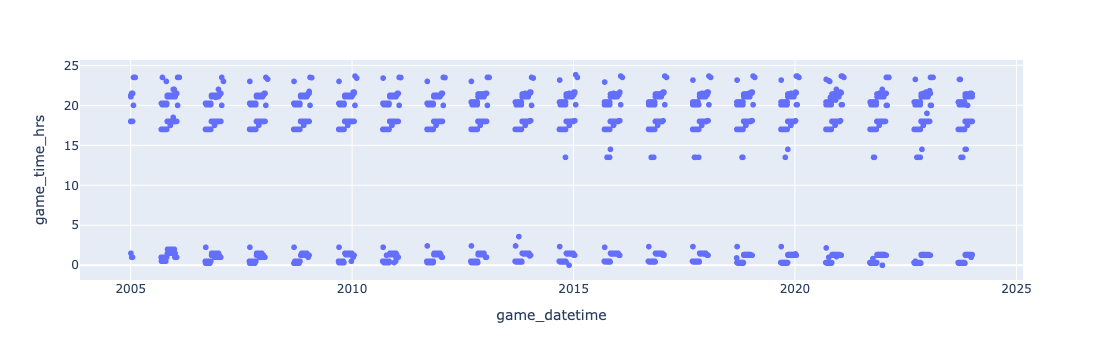

In [153]:
fig = px.scatter(df_final, x="game_datetime", y="game_time_hrs")
fig.show()